Copyright (c) Meta Platforms, Inc. and affiliates.
All rights reserved.

This source code is licensed under the terms described in the LICENSE file in
the root directory of this source tree.

<a aria-label="Meta home" href="https://www.llama.com/docs" tabindex="0" target="_blank" >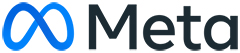</a>

<a href="https://colab.research.google.com/github/meta-llama/llama-cookbook/blob/main/getting-started/llama-tools/llama-prompt-ops_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Getting Started with [llama-prompt-ops](https://github.com/meta-llama/llama-prompt-ops)

This notebook will guide you through the process of using [llama-prompt-ops](https://github.com/meta-llama/llama-prompt-ops) to optimize your prompts for Llama models. We'll cover:

1. Introduction to llama-prompt-ops
2. Setting up your environment
3. Creating a sample project
4. Running prompt optimization
5. Analyzing the results
6. Advanced usage and customization

## 1. Introduction to llama-prompt-ops

### What is llama-prompt-ops?

llama-prompt-ops is a Python package that **automatically optimizes prompts** for Llama models. It transforms prompts that work well with other LLMs into prompts that are optimized for Llama models, improving performance and reliability.

### How It Works

llama-prompt-ops takes three key inputs:
1. Your existing system prompt
2. A dataset of query-response pairs for evaluation and optimization
3. A configuration file specifying model parameters and optimization details

It then applies optimization techniques to transform your prompt into one that works better with Llama models, and provides metrics to measure the improvement.

## 2. Setting up your environment

Let's start by installing the Llama Prompt Ops package and setting up our environment. You can install it either from PyPI or directly from the source code.

In [ ]:
# Install from PyPI
!pip install llama-prompt-ops

### Setting up your API key

Llama Prompt Ops requires an API key to access LLM services. You can use OpenRouter, which provides access to various models including Llama models.

Create a `.env` file in your project directory with your API key:

In [ ]:
# Create a .env file with your API key
%%writefile .env
OPENROUTER_API_KEY=your_key_here

You'll need to replace `your_key_here` with your actual OpenRouter API key. You can get an OpenRouter API key by creating an account at [OpenRouter](https://openrouter.ai/).

Let's load the environment variables from the .env file:

In [ ]:
# Load environment variables from .env file
import os
from dotenv import load_dotenv

load_dotenv()

# Verify the API key is loaded (will show as masked)
api_key = os.getenv("OPENROUTER_API_KEY")
if api_key:
    print(f"API key loaded: {'*' * len(api_key)}")
else:
    print("API key not found. Please check your .env file.")

## 3. Creating a Sample Project

Llama Prompt Ops provides a convenient way to create a sample project with all the necessary files. Let's create a sample project to get started.

In [ ]:
# Create a sample project
!llama-prompt-ops create my-notebook-project

This command creates a directory called `my-notebook-project` with a sample configuration and dataset. Let's explore the files that were created:

In [ ]:
!ls -la my-notebook-project

The sample project includes:
- `.env`: A file for your API key
- `README.md`: Documentation for the project
- `config.yaml`: Configuration file for prompt optimization
- `data/dataset.json`: Sample dataset for evaluation and optimization
- `prompts/prompt.txt`: Sample system prompt to optimize

Let's examine the configuration file:

In [ ]:
!cat my-notebook-project/config.yaml

The configuration file specifies:
- The system prompt to optimize
- The dataset to use for evaluation and optimization
- The model to use for optimization and evaluation
- The metric to use for evaluation
- The optimization strategy to use

Let's also look at the sample prompt and dataset:

In [ ]:
!cat my-notebook-project/prompts/prompt.txt

In [ ]:
!head -n 20 my-notebook-project/data/dataset.json

## 4. Running Prompt Optimization

Now that we have our sample project set up, let's run the prompt optimization process. We'll use the `migrate` command, which takes a configuration file as input and outputs an optimized prompt.

In [ ]:
# Run prompt optimization
!cd my-notebook-project && llama-prompt-ops migrate

The optimization process will take a few minutes to complete. It involves:
1. Loading your system prompt and dataset
2. Analyzing the prompt structure and content
3. Applying optimization techniques specific to Llama models
4. Evaluating the optimized prompt against the original prompt
5. Saving the optimized prompt to the `results/` directory

Let's check the results directory to see the optimized prompt. If the optimizer successfully found a better prompt, it will be saved in the `results/` directory. You may need to run the optimization process again with different parameters or a larger dataset if the prompt is the same as the original.

In [ ]:
!ls -la my-notebook-project/results/

The optimized prompt is saved as a YAML file with a timestamp. Let's examine the contents of the optimized prompt:

In [ ]:
import glob
import yaml

# Find the most recent result file
result_files = glob.glob('my-notebook-project/results/*.yaml')
if result_files:
    latest_result = max(result_files, key=os.path.getctime)
    print(f"Latest result file: {latest_result}")
    
    # Load and display the optimized prompt
    with open(latest_result, 'r') as f:
        result = yaml.safe_load(f)
        print("\nOptimized System Prompt:")
        print(result.get('system', 'No system prompt found'))
else:
    print("No result files found. Make sure the optimization process completed successfully.")

## 5. Analyzing the Results

Let's compare the original prompt with the optimized prompt to understand the changes made during optimization.

In [ ]:
# Load the original prompt
with open('my-notebook-project/prompts/prompt.txt', 'r') as f:
    original_prompt = f.read()

# Find the most recent result file again
result_files = glob.glob('my-notebook-project/results/*.yaml')
if result_files:
    latest_result = max(result_files, key=os.path.getctime)
    
    # Load the optimized prompt
    with open(latest_result, 'r') as f:
        result = yaml.safe_load(f)
        optimized_prompt = result.get('system', 'No system prompt found')
    
    # Print the comparison
    print("Original Prompt:")
    print("-" * 80)
    print(original_prompt)
    print("\n" + "-" * 80)
    print("\nOptimized Prompt:")
    print("-" * 80)
    print(optimized_prompt)
    print("-" * 80)
else:
    print("No result files found. Make sure the optimization process completed successfully.")

### Key Differences in the Optimized Prompt

The optimized prompt typically includes several improvements:

1. **Better Structure**: Llama models respond better to clear, structured instructions
2. **Llama-Specific Formatting**: Formatting that works better with Llama's training patterns
3. **Few-Shot Examples**: Examples that help the model understand the expected output format
4. **Clear Output Expectations**: More explicit instructions about what the output should look like

These changes can significantly improve the model's performance on your specific task.

## 6. Advanced Usage and Customization

### Using Your Own Data

To use your own data with Llama Prompt Ops, you'll need to:

1. Prepare your dataset in JSON format
2. Create a system prompt file
3. Create a configuration file

Check out the comprehensive guide [here](https://github.com/meta-llama/llama-prompt-ops/tree/main/docs) to learn more.

Now, let's see how to create a custom configuration file:



In [ ]:
%%writefile custom_config.yaml
system_prompt:
  file: "path/to/your/prompt.txt"
  inputs: ["question"]
  outputs: ["answer"]

# Dataset configuration
dataset:
  path: "path/to/your/dataset.json"
  input_field: "question"  # or ["fields", "input"] for nested fields
  golden_output_field: "answer"

# Model configuration
model:
  task_model: "openrouter/meta-llama/llama-3.3-70b-instruct"
  proposer_model: "openrouter/meta-llama/llama-3.3-70b-instruct"

# Metric configuration
metric:
  class: "llama_prompt_ops.core.metrics.StandardJSONMetric"
  strict_json: false
  output_field: "answer"

# Optimization settings
optimization:
  strategy: "llama"

Overwriting custom_config.yaml


### Using Different Metrics

Llama Prompt Ops supports different metrics for evaluating prompt performance. The default is `StandardJSONMetric`, but you can use other metrics like `FacilityMetric` for specific use cases.

Here's an example of using the `FacilityMetric` for the facility support analyzer use case:

In [ ]:
%%writefile facility_config.yaml
system_prompt:
  file: "prompts/facility_prompt.txt"
  inputs: ["question"]
  outputs: ["answer"]

# Dataset configuration
dataset:
  path: "data/facility_dataset.json"
  input_field: ["fields", "input"]
  golden_output_field: "answer"

# Model configuration
model:
  name: "openrouter/meta-llama/llama-3.3-70b-instruct"
  task_model: "openrouter/meta-llama/llama-3.3-70b-instruct"
  proposer_model: "openrouter/meta-llama/llama-3.3-70b-instruct"

# Metric configuration
metric:
  class: "llama_prompt_ops.core.metrics.FacilityMetric"
  strict_json: false
  output_field: "answer"

# Optimization settings
optimization:
  strategy: "llama"

### Using Different Models

Llama Prompt Ops supports different models through various inference providers. You can use OpenRouter, vLLM, or NVIDIA NIMs depending on your infrastructure needs.

Here's an example of using a different model through OpenRouter:

In [ ]:
%%writefile different_model_config.yaml
system_prompt:
  file: "prompts/prompt.txt"
  inputs: ["question"]
  outputs: ["answer"]

# Dataset configuration
dataset:
  path: "data/dataset.json"
  input_field: "question"
  golden_output_field: "answer"

# Model configuration
model:
  name: "openrouter/meta-llama/llama-3.1-8b-instruct"
  task_model: "openrouter/meta-llama/llama-3.1-8b-instruct"
  proposer_model: "openrouter/meta-llama/llama-3.1-8b-instruct"

# Metric configuration
metric:
  class: "llama_prompt_ops.core.metrics.StandardJSONMetric"
  strict_json: false
  output_field: "answer"

# Optimization settings
optimization:
  strategy: "llama"

## Conclusion

In this notebook, we've covered:

1. Introduction to Llama Prompt Ops and its benefits
2. Creating a sample project
3. Setting up your environment and API key
4. Running prompt optimization
5. Analyzing the results
6. Advanced usage and customization options

Llama Prompt Ops provides a powerful way to optimize your prompts for Llama models, improving performance and reliability. By following the steps in this notebook, you can start optimizing your own prompts and building more effective LLM applications.

For more information, check out the [llama-prompt-ops documentation](https://github.com/meta-llama/llama-prompt-ops/tree/main/docs) and explore the example use cases in the repository.